## 2.0 
**Problem Statement.** A parachutist of mass 60 kg jumps out of the stationary air baloon. The upward drag force due to air resistance is proportional to the square of the velocity $$ F_D = -b\upsilon^2 $$ where $b$ is a drag coefficient (kg/m). The drag coefficient is $ b= 0.2 $ kg/m.  

## 2.1
Newton's second law: $$F_D + F_m = m\frac{d\upsilon}{dt}$$ where $F_m = mg$ is the gravitational force, $g = 9.8$ m/s<sup>2</sup> and $m$ is the mass. 
$$ -b\upsilon^2 + mg = m\frac{d\upsilon}{dt} $$
$$ -b\upsilon^2 - m\frac{d\upsilon}{dt} + mg = 0 \tag{2.1}$$
## 2.2 
Let's rearrange some terms of (2.1): $$1 = \frac{m}{mg - b\upsilon^2}\frac{d\upsilon}{dt}$$
RHS can be separated into two fractions: $$1 = \frac{m}{2\sqrt{mg}}\left(\frac{1}{\sqrt{mg} - \sqrt{b}\upsilon}+\frac{1}{\sqrt{mg} + \sqrt{b}\upsilon}\right)\frac{d\upsilon}{dt}$$
Separating variables and integrating from $0$ to $t$: $$\int_{0}^{t}dt = \frac{m}{2\sqrt{mg}}\left( \int_{\upsilon(0)}^{\upsilon(t)}\frac{1}{\sqrt{mg} - \sqrt{b}\upsilon}d\upsilon + \int_{v(0)}^{\upsilon(t)}\frac{1}{\sqrt{mg} + \sqrt{b}\upsilon}d\upsilon \right)$$
$$t \ \big|_0^t = \frac{m}{2\sqrt{mg}}\left( -\frac{1}{\sqrt{b}}\ln(\sqrt{mg} - \sqrt{b}\upsilon) \ \big|_{\upsilon(0)}^{\upsilon(t)} + \frac{1}{\sqrt{b}}\ln(\sqrt{mg} + \sqrt{b}\upsilon) \ \big|_{\upsilon(0)}^{\upsilon(t)} \right)$$
Putting the integral limits and using that $\upsilon(0) = 0$ (since initially parachutist was stationary): $$\frac{2\sqrt{mgb}}{m}t = \ln\left(\frac{\sqrt{mg} + \sqrt{b}\upsilon(t)}{\sqrt{mg} - \sqrt{b}\upsilon(t)}\right)$$
$$e^{\frac{2\sqrt{mgb}}{m}t} - 1 = \frac{2\sqrt{b}\upsilon(t)}{\sqrt{mg} - \sqrt{b}\upsilon(t)}$$
Solving for $\upsilon(t)$: $$\upsilon(t) = \frac{e^{2\sqrt{\frac{gb}{m}}t} - 1}{e^{2\sqrt{\frac{gb}{m}}t} + 1}\sqrt{\frac{mg}{b}} \tag{2.2}$$
## 2.3
By definition terminal velocity is: $$\upsilon_T = \lim_{t\rightarrow\infty}\upsilon(t)$$
$$\upsilon_T = \sqrt{\frac{mg}{b}}\lim_{t\rightarrow\infty}\frac{e^{2\sqrt{\frac{gb}{m}}t} - 1}{e^{2\sqrt{\frac{gb}{m}}t} + 1}$$
$$\upsilon_T = \sqrt{\frac{mg}{b}} \tag{2.3}$$

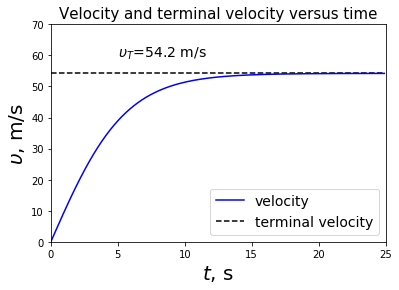

In [131]:
#2.4
import numpy as np
import matplotlib.pyplot as plt

#time
t = np.arange(0,25,0.1)

#parameters
g = 9.8 #m/s^2
m = 60 #kg
b = 0.2 #kg/m

#labeling
plt.title('Velocity and terminal velocity versus time', fontsize='15')
plt.xlabel(r'$t$, s',size=20)
plt.ylabel(r'$\upsilon$, m/s',size=20)
plt.xlim(0,25)
plt.ylim(0,70)
plt.text(5,1.1*v_T, \
         r'$\upsilon_T$='+ \
         str(round(v_T,1))+' m/s', size=14)

#terminal velocity
v_T = np.sqrt(m*g/b)

#analytical velocity
def v(t):
    v = v_T*(np.exp(2*np.sqrt(g*b/m)*t)-1)/(np.exp(2*np.sqrt(g*b/m)*t)+1)
    return v

#plotting v vs. t and v_T vs. t
plt.hlines(v_T,min(t),max(t),linestyles='dashed', label='terminal velocity')
plt.plot(t,v(t),'b', label='velocity')
plt.legend(loc='lower right',fontsize='14')
plt.show()

In [132]:
#2.5

#equating (2.2) to 95% of the terminal velocity and solving for t we get:
t_95 = np.log(1.95/0.05)/2*np.sqrt(m/g/b)

print(f'The time required for the velocity to reach 95% of the terminal velocity is about {round(t_95, 1)} seconds.')

The time required for the velocity to reach 95% of the terminal velocity is about 10.1 seconds.


## 2.6
Forward difference approximation of the derivative $\frac{d\upsilon}{dt}$ at time $t_i$: $$\frac{d\upsilon}{dt} = \frac{\upsilon(t_{i+1})-\upsilon(t_{i})}{t_{i+1}-t_{i}}$$
Substituting it in (2.1):
$$ -b\upsilon(t_i)^2 - m\frac{\upsilon(t_{i+1})-\upsilon(t_{i})}{t_{i+1}-t_{i}} + mg = 0$$
$$ \upsilon(t_{i+1}) = \upsilon(t_i) + (g-\frac{b}{m}\upsilon(t_i)^2)(t_{i+1}-t_{i}) \tag{2.6}$$

In [133]:
#2.7
import numpy as np
import matplotlib.pyplot as plt

#time
t = np.arange(0,10,0.1) #time step size 0.1
t_1 = np.arange(0,10,1) #time step size 1

#parameters
g = 9.8 #m/s^2
m = 60 #kg
b = 0.2 #kg/m

#initial velocity
v_0 = 0 # v_i, i=0

#numerical velocity
def v_N(t):
    v_num = np.empty(t.shape)
    v_num[0] = v_0
    for i in range(len(t)-1):
        v_num[i+1] = v_num[i] + (g - b/m*np.power(v_num[i], 2)) * (t[i+1] - t[i])
    return v_num

v_num = v_N(t) #numberical approximation with time step size 0.1
v_num_1 = v_N(t_1) #numberical approximation with time step size 1

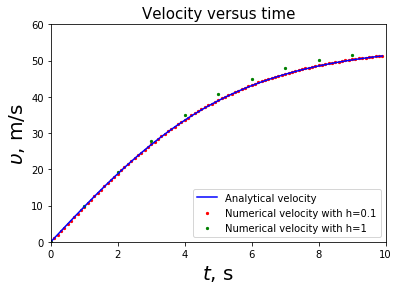

In [134]:
#2.8

#labeling
plt.title('Velocity versus time', fontsize='15')
plt.xlabel(r'$t$, s',size=20)
plt.ylabel(r'$\upsilon$, m/s',size=20)
plt.xlim(0,10)
plt.ylim(0,60)

plt.plot(t,v(t),c='b', label='Analytical velocity')
plt.scatter(t,v_N(t),c='r',s=5,label='Numerical velocity with h=0.1')
plt.scatter(t_1,v_N(t_1),c='g',s=5,label='Numerical velocity with h=1')
plt.legend(loc='lower right',fontsize='10')
plt.show()

## 2.9
From the first part of the problem we have found out that parachutist reaches 95% of his/her terminal velocity only in about 10 seconds, which is extremely fast taking into account that terminal velocity is his/her velocity at infinity. From the second part of the problem we have found out that next step of the Euler's method for parachutist's motion is quadratically proportional to the current step. After the implementation of the Euler's method from the graph we can see that points of the numerical velocity with time steps 0.1 almost overlap the curve of the analytical velocity. However, despite the fact that points of the numerical velocity with time steps 1 repeat the behaviour of the analytical velocity, the approximation has small value discrepancy. From this we can clearly conclude that smaller step size guarantees better approximation of the exact value.